## Cosine Simiarity

In [1]:
import numpy as np

X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

# Preparing the Data

In [2]:
import pandas as pd

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


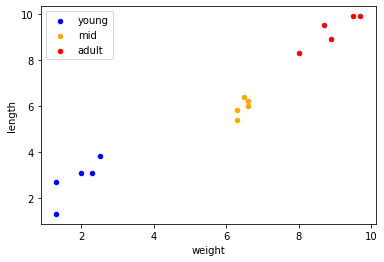

In [4]:
%matplotlib inline

ax = df[df["label"] == 0].plot.scatter(x="weight", y="length", c="blue", label="young")
ax = df[df["label"] == 1].plot.scatter(x="weight", y="length", c="orange", label="mid", ax=ax)
ax = df[df["label"] == 2].plot.scatter(x="weight", y="length", c="red", label="adult", ax=ax)
ax                                       

## Picking our Metric

In [5]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=["weight", "length", "label"])
df3 = pd.DataFrame([df.iloc[14]], columns=["weight", "length", "label"])

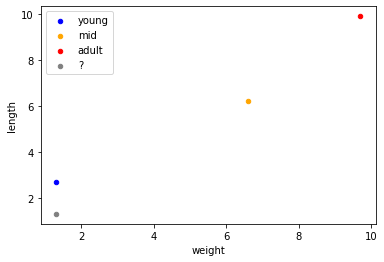

In [6]:
ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x="weight", y="length", c="gray", label="?", ax=ax)
ax

## Euclidean

In [7]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum(x-y) ** 2)

In [8]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]


In [9]:
print(" x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

 x14 and x0: 10.2 
 x14 and x1: 17.0 
 x14 and x4: 1.4000000000000001


## Cosine

In [10]:
# Where x and y are two vectors.

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [11]:
# Let's see these calculations for all our vectors:

print(" x14 and x0:", cosine_similarity(x14, x0), "\n",
      "x14 and x1:", cosine_similarity(x14, x1), "\n",
      "x14 and x4:", cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174


## Cosine in Action

In [13]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=5926a0c7a9bcf772d076716ad7d034ae2d801df156194ee5f9da63b19d32f7e1
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [23]:
import wikipedia

q1 = wikipedia.page("Deep Learning")
q2 = wikipedia.page('Artifical Intelligence')
q3 = wikipedia.page('Soccer')
q4 = wikipedia.page("Cricket")

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = np.array(cv.fit_transform([q1.content, q2.content, q3.content, q4.content]).todense())

In [30]:
print(X)

[[4 0 0 ... 0 0 0]
 [1 1 2 ... 0 2 0]
 [2 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]]


In [32]:
print("DL \t", len(q1.content.split()), "\n"
"AI \t", len(q2.content.split()), "\n"
"Soccer \t", len(q3.content.split()), "\n"
"Cricket \t", len(q4.content.split()))

# AI is a much larger article than Machine Learning (ML)
# This would mean that if we do not normalize our vectors, 
# AI will be much further away from ML just because it has many more words

DL 	 6896 
AI 	 15138 
Soccer 	 6634 
Cricket 	 8906


In [33]:
print("DL - AI \t", euclidean_distance(X[0], X[1]), "\n"
      "DL - soccer \t", euclidean_distance(X[0], X[2]), "\n"
      "DL - tennis \t", euclidean_distance(X[0], X[3]))

# Here we can see pretty clearly that our prior assumptions have been confirmed.
# DL seems to be closest to AI,

DL - AI 	 8221.0 
DL - soccer 	 318.0 
DL - tennis 	 1818.0


In [34]:
print("DL - AI \t", cosine_similarity(X[0], X[1]), "\n"
      "DL - soccer \t", cosine_similarity(X[0], X[2]), "\n"
      "DL - tennis \t", cosine_similarity(X[0], X[3]))

# DL is closer to AI! Granted

DL - AI 	 0.8726366055914032 
DL - soccer 	 0.807381248742486 
DL - tennis 	 0.8127093914708072


## Categorize a Tweet

In [35]:
# Now, just for fun, let’s see how this plays out for the following tweet by OpenAI:

ml_tweet = "New research release: overcoming many of Reinforcement Learning's limitations with Evolution Strategies."
x = np.array(cv.transform([ml_tweet]).todense())[0]

# Again we represent this tweet as a word vector,
#  we try to measure the distance between the tweet and our four wikipedia documents:

In [36]:
print("tweet - DL \t", euclidean_distance(x[0], X[0]), "\n"
      "tweet - AI \t", euclidean_distance(x[0], X[1]), "\n"
      "tweet - soccer \t", euclidean_distance(x[0], X[2]), "\n"
      "tweet - Cricket \t", euclidean_distance(x[0], X[3]))

tweet - DL 	 6819.0 
tweet - AI 	 15040.0 
tweet - soccer 	 6501.0 
tweet - Cricket 	 8637.0


In [37]:
print("tweet - DL \t", cosine_similarity(x, X[0]), "\n"
      "tweet - AI \t", cosine_similarity(x, X[1]), "\n"
      "tweet - soccer \t", cosine_similarity(x, X[2]), "\n"
      "tweet - Cricket \t", cosine_similarity(x, X[3]))

tweet - DL 	 0.22499675853445308 
tweet - AI 	 0.16829731907771311 
tweet - soccer 	 0.11777408767032184 
tweet - Cricket 	 0.10916451351506397


In [38]:
so_tweet = "#LegendsDownUnder The Reds are out for the warm up at the @nibStadium. Not long now until kick-off in Perth."
x2 = np.array(cv.transform([so_tweet]).todense())[0]

In [40]:
print("tweet - DL \t", euclidean_distance(x2, X[0]), "\n"
      "tweet - AI \t", euclidean_distance(x2, X[1]), "\n"
      "tweet - soccer \t", euclidean_distance(x2, X[2]), "\n"
      "tweet - Cricket \t", euclidean_distance(x2, X[3]))

tweet - DL 	 6803.0 
tweet - AI 	 15024.0 
tweet - soccer 	 6485.0 
tweet - Cricket 	 8621.0


In [41]:
print("tweet - DL \t", cosine_similarity(x2, X[0]), "\n"
      "tweet - AI \t", cosine_similarity(x2, X[1]), "\n"
      "tweet - soccer \t", cosine_similarity(x2, X[2]), "\n"
      "tweet - Cricket \t", cosine_similarity(x2, X[3]))


tweet - DL 	 0.4601108129929207 
tweet - AI 	 0.4909725044659564 
tweet - soccer 	 0.6179646084314173 
tweet - Cricket 	 0.6108276287946603
